In [1]:
import pandas as pd


In [7]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [21]:
df.head(1)

,tar_key,embedding,class_name,span_start,span_end,youtube_id,x,y,cluster_id,span_duration,duration_category
0,00b0c5af-7588-4760-a5ea-4c6d3bf46b11,"[0.08740234375, -0.10546875, 0.0830078125, -0....",00b0c5af-7588-4760-a5ea-4c6d3bf46b11,4890.0,4910.0,Ahjke3hVOeU,-43.500721,36.12685,589,20.0,>= 20


Span Duration Distribution:
count    21228.000000
mean        19.988145
std          0.297556
min         10.000000
25%         20.000000
50%         20.000000
75%         20.000000
max         20.000000
Name: span_duration, dtype: float64

Unique span durations:
[np.float64(10.0), np.float64(10.006673340006728), np.float64(10.013346680013456), np.float64(10.04166666666697), np.float64(10.099999999999909), np.float64(10.200000000000045), np.float64(10.236903570237246), np.float64(10.400000000000091), np.float64(10.58333333333303), np.float64(10.613083333332725), np.float64(10.633333333333212), np.float64(10.666666666666515), np.float64(11.197864531197865), np.float64(11.400000000000091), np.float64(11.608274941608443), np.float64(12.290700000000015), np.float64(12.66666666666697), np.float64(12.962166666667144), np.float64(13.159999999999854), np.float64(14.166666666666515), np.float64(14.574574574574399), np.float64(14.591257924591446), np.float64(14.766666666666652), np.float64(15.03

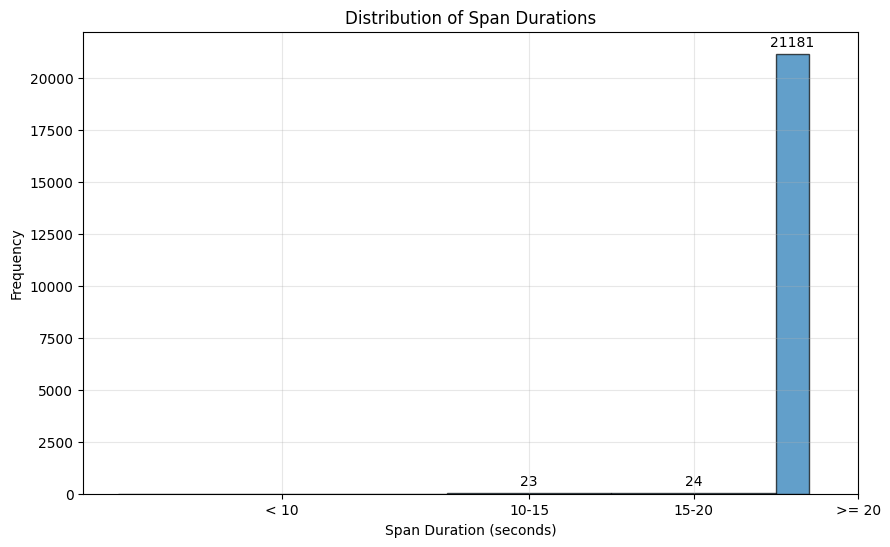


Percentage distribution:
< 10: 0 (0.0%)
10-15: 23 (0.1%)
15-20: 24 (0.1%)
>= 20: 21181 (99.8%)


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the parquet file
df = pd.read_parquet('/Users/lilyzhang/Desktop/Qwen2.5-VL/embedding_search/official_app/src/opendrive_val.parquet')

# Calculate span duration
df['span_duration'] = df['span_end'] - df['span_start']

print("Span Duration Distribution:")
print("="*30)
print(df['span_duration'].describe())

print(f"\nUnique span durations:")
print(sorted(df['span_duration'].unique()))

# Create bins as requested: <10, 10-15, 15-20, >20
bins = [0, 10, 15, 20, float('inf')]
labels = ['< 10', '10-15', '15-20', '>= 20']

# Categorize durations into bins
df['duration_category'] = pd.cut(df['span_duration'], bins=bins, labels=labels, right=False)

print(f"\nSpan duration by categories:")
category_counts = df['duration_category'].value_counts().sort_index()
print(category_counts)

# Create histogram with custom bins
plt.figure(figsize=(10, 6))
counts, bin_edges, patches = plt.hist(df['span_duration'], bins=[0, 10, 15, 20, df['span_duration'].max() + 1], 
                                     alpha=0.7, edgecolor='black')

# Customize the plot
plt.xlabel('Span Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Span Durations')
plt.grid(True, alpha=0.3)

# Set custom x-tick labels
plt.xticks([5, 12.5, 17.5, 22.5], ['< 10', '10-15', '15-20', '>= 20'])

# Add count labels on bars
for i, count in enumerate(counts):
    if count > 0:
        plt.text(bin_edges[i] + (bin_edges[i+1] - bin_edges[i])/2, count + max(counts)*0.01, 
                f'{int(count)}', ha='center', va='bottom')

plt.show()

# Print percentages
total_count = len(df)
print(f"\nPercentage distribution:")
for category, count in category_counts.items():
    percentage = (count / total_count) * 100
    print(f"{category}: {count} ({percentage:.1f}%)")

In [5]:
df_opendrive.head(1)

,tar_key,embedding,class_name,span_start,span_end,youtube_id,x,y,cluster_id
0,00b0c5af-7588-4760-a5ea-4c6d3bf46b11,"[0.08740234375, -0.10546875, 0.0830078125, -0....",00b0c5af-7588-4760-a5ea-4c6d3bf46b11,4890.0,4910.0,Ahjke3hVOeU,-43.500721,36.12685,589


In [2]:
df_1 = pd.read_parquet('/Users/lilyzhang/Desktop/Qwen2.5-VL/embedding_search/data/unified_embeddings.parquet')
df_2 = pd.read_parquet('/Users/lilyzhang/Desktop/Qwen2.5-VL/embedding_search/data/unified_embeddings_.parquet')



In [3]:
merged_df = pd.concat([df_1, df_2])
merged_df.to_parquet('/Users/lilyzhang/Desktop/Qwen2.5-VL/embedding_search/data/unified_embeddings.parquet', index=False)